In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cd 'drive/MyDrive/TEMC/trabalho'

/content/drive/MyDrive/TEMC/trabalho


In [4]:
#install pyswarm
pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=3e1bb77a6946f3c2abc9652e0606554287e8bc277cf6d8b2f73bf81c69c7ef8e
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [5]:
from pyswarm import pso

In [6]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from scipy.optimize import differential_evolution

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exibir DataFrame

train.head(1000)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [8]:
titanic_df = pd.concat([train, test])
titanic_df.head(1300)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,277.208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,138.625,D38,C
406,1298,0,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5,NaN,S
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5,C80,C


In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000


In [10]:
# Contar o número de ocorrências de cada classe na variável-alvo 'Survived'
survived_counts = titanic_df['Survived'].value_counts()

# Exibir a contagem de ocorrências de cada classe
print("Contagem de ocorrências de cada classe na variável-alvo 'Survived':")
print(survived_counts)

Contagem de ocorrências de cada classe na variável-alvo 'Survived':
Survived
0    815
1    494
Name: count, dtype: int64


In [11]:
#Não há valores duplicados
titanic_df[titanic_df.duplicated() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [12]:
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

max_fare_row = titanic_df.loc[titanic_df['Fare'].idxmax()]

print(max_fare_row)

     PassengerId  Survived  Pclass                                   Name  \
150          151         0       2             Bateman, Rev. Robert James   
150         1042         1       1  Earnshaw, Mrs. Boulton (Olive Potter)   

        Sex   Age  SibSp  Parch       Ticket     Fare Cabin Embarked  
150    male  51.0      0      0  S.O.P. 1166   12.525   NaN        S  
150  female  23.0      0      1        11767  831.583   C54        C  


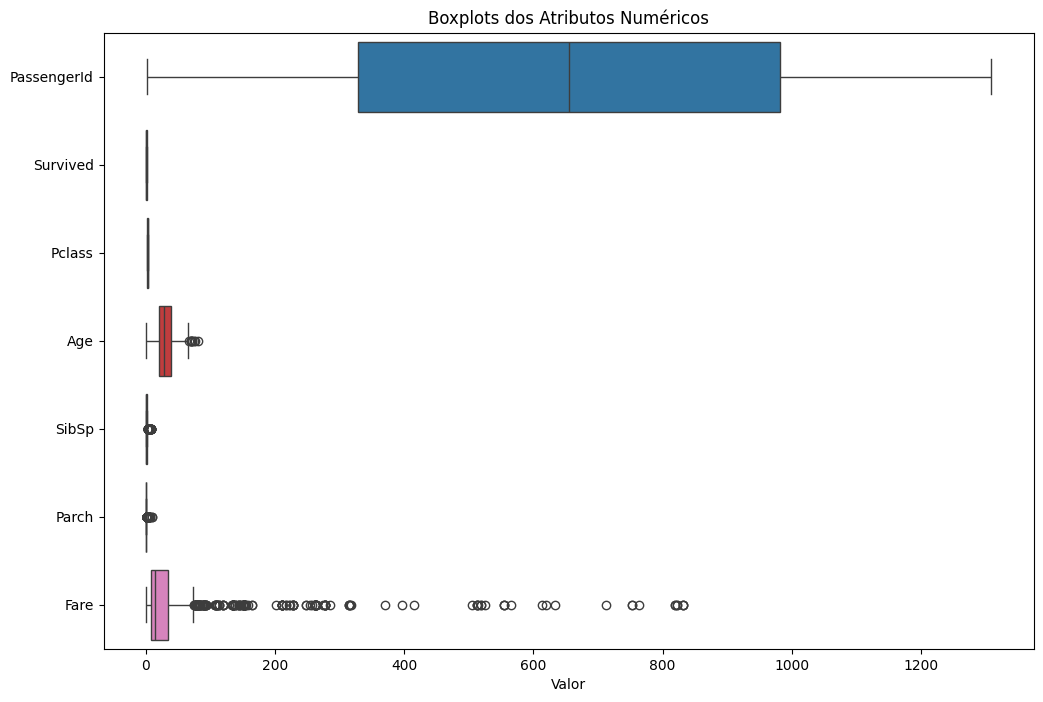

In [13]:
# Selecionar apenas atributos numéricos
atributos_numericos = titanic_df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(12, 8))
sns.boxplot(data=atributos_numericos, orient="h")
plt.title("Boxplots dos Atributos Numéricos")
plt.xlabel("Valor")
plt.show()

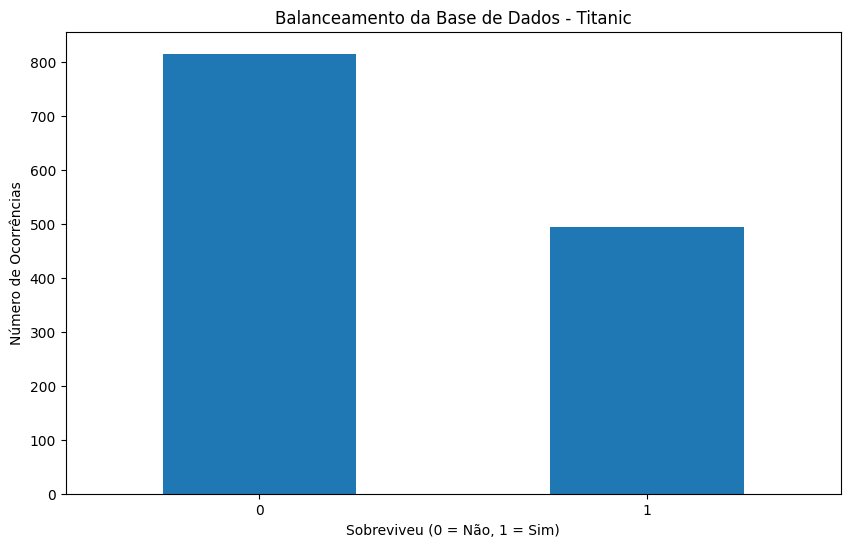

In [14]:
contagem_classes = titanic_df['Survived'].value_counts()

# Plota o gráfico de barras
plt.figure(figsize=(10,6))
contagem_classes.plot(kind='bar')
plt.title('Balanceamento da Base de Dados - Titanic')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=0)
plt.show()

In [15]:
#Calculando a media para todos os atributos
titanic_df.mean(numeric_only=True)

PassengerId    655.000000
Survived         0.377387
Pclass           2.294882
Age             29.881138
SibSp            0.498854
Parch            0.385027
Fare            48.624269
dtype: float64

In [16]:
#Calculando o desvio-padrão para todos os atributos
titanic_df.std(numeric_only=True)

PassengerId    378.020061
Survived         0.484918
Pclass           0.837836
Age             14.413493
SibSp            1.041658
Parch            0.865560
Fare           104.436107
dtype: float64

In [17]:
#Calculando a variância para todos os atributos
titanic_df.var(numeric_only=True)

PassengerId    142899.166667
Survived            0.235146
Pclass              0.701969
Age               207.748787
SibSp               1.085052
Parch               0.749195
Fare            10906.900384
dtype: float64

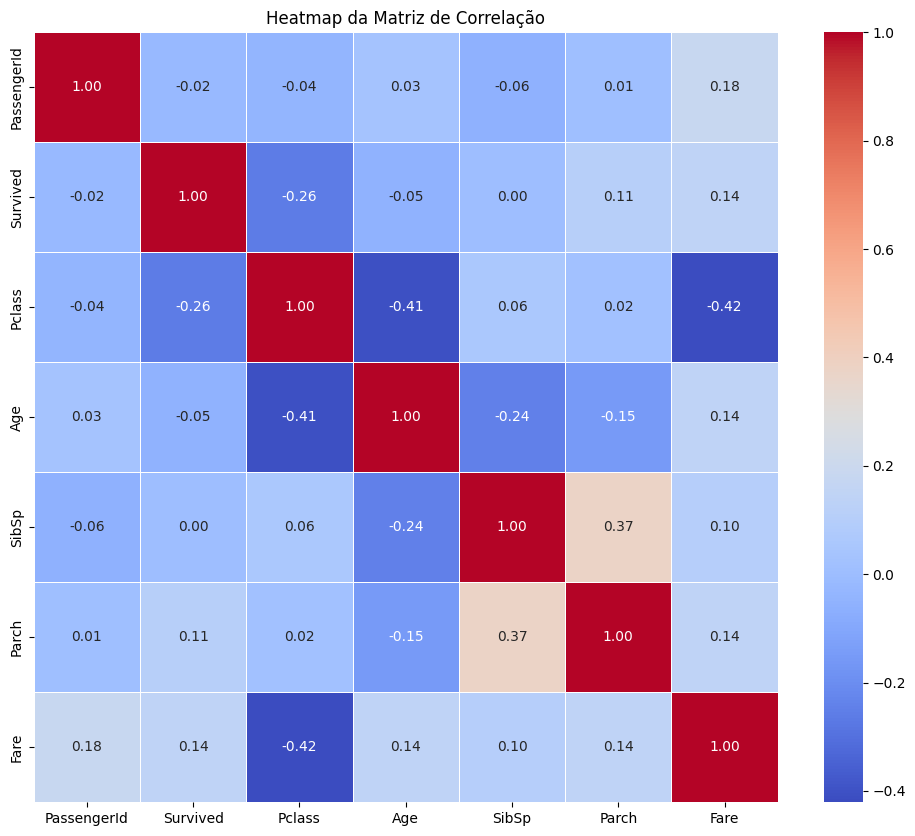

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



correlacao = titanic_df.corr(numeric_only=True)

# Configurar a figura
plt.figure(figsize=(12, 10))

# Criar o heatmap
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Adicionar título ao heatmap
plt.title('Heatmap da Matriz de Correlação')

# Salvar a figura
plt.savefig('heatmap_correlacao.png')

# Exibir a figura
plt.show()

In [19]:
#Calculando o valor minimo de cada atributo
titanic_df.min(numeric_only=True)

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.17
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

In [20]:
#Calculando o valor maximo de cada atributo
titanic_df.max(numeric_only=True)

PassengerId    1309.000
Survived          1.000
Pclass            3.000
Age              80.000
SibSp             8.000
Parch             9.000
Fare            831.583
dtype: float64

In [21]:
#Soma dos valores faltantes de cada atributo
titanic_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare             13
Cabin          1014
Embarked          2
dtype: int64

In [22]:
titanic_df[titanic_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
#Após verificar manualmente os valores de embarque faltantes, encontrei que os dois passageiros embarcaram em Southampton, e os valores faltantes recebem 'S'
titanic_df.loc[titanic_df.Embarked.isnull(), 'Embarked'] = 'S'


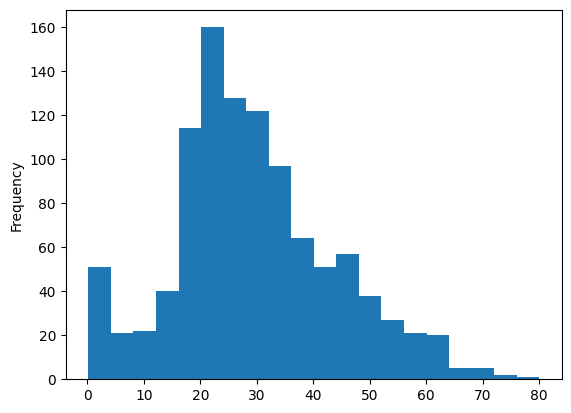

In [24]:
titanic_df.Age.plot.hist(bins=20);
#Gráfico para analizar a idade dos passageiros

In [25]:
#Subistituindo os valores faltantes da idade pela media que é 29 anos
titanic_df.loc[titanic_df.Age.isnull(), 'Age'] = '29'

In [26]:
# Eliminando as colunas 'Cabin', 'PassengerId','Ticket' e 'Name'
titanic_df = titanic_df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)

In [27]:
# Substituindo os valores 'male' por 0 e 'female' por 1 na coluna 'Sex'

titanic_df['MaleCheck'] = titanic_df.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [28]:
titanic_df[['Sex', 'MaleCheck']].value_counts()

Sex     MaleCheck
male    1            843
female  0            466
Name: count, dtype: int64

In [29]:
#Ultilizando o OneHotEncoder para substituir os valores qualitativas Da coluna Embarked para valores quantitativos
ohe = OneHotEncoder(handle_unknown = 'ignore',dtype ='int32')
ohe = ohe.fit(titanic_df[['Embarked']])



In [30]:
#Transformar Embarked em array
ohe.transform(titanic_df[['Embarked']]).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=int32)

In [31]:
ohe_df = pd.DataFrame(ohe.transform(titanic_df[['Embarked']]).toarray(), columns=ohe.get_feature_names_out(['Embarked']))
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1


In [32]:
import pandas as pd

# Redefinir os índices dos DataFrames
titanic_df.reset_index(drop=True, inplace=True)
ohe_df.reset_index(drop=True, inplace=True)

# Concatenar os DataFrames
titanic_df = pd.concat([titanic_df, ohe_df], axis=1)

print(titanic_df)

      Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  \
0            0       3    male  22.0      1      0    7.2500        S   
1            1       1  female  38.0      1      0   71.2833        C   
2            1       3  female  26.0      0      0    7.9250        S   
3            1       1  female  35.0      1      0   53.1000        S   
4            0       3    male  35.0      0      0    8.0500        S   
...        ...     ...     ...   ...    ...    ...       ...      ...   
1304         0       3    male    29      0      0    8.0500        S   
1305         1       1  female  39.0      0      0  108.9000        C   
1306         0       3    male  38.5      0      0    7.2500        S   
1307         0       3    male    29      0      0    8.0500        S   
1308         0       3    male    29      1      1  223.5830        C   

      MaleCheck  Embarked_C  Embarked_Q  Embarked_S  
0             1           0           0           1  
1             0

In [33]:
titanic_df[[ 'Embarked_C', 'Embarked_Q', 'Embarked_S' ]].value_counts()


Embarked_C  Embarked_Q  Embarked_S
0           0           1             916
1           0           0             270
0           1           0             123
Name: count, dtype: int64

In [34]:
titanic_df.drop(['Embarked','Sex'], axis=1, inplace=True)


In [35]:
print("\nNúmero de valores ausentes em cada coluna:")
print(titanic_df.isna().sum())


Número de valores ausentes em cada coluna:
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare          13
MaleCheck      0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [36]:

fare_mean = titanic_df['Fare'].mean()

titanic_df['Fare'].fillna(fare_mean, inplace=True)


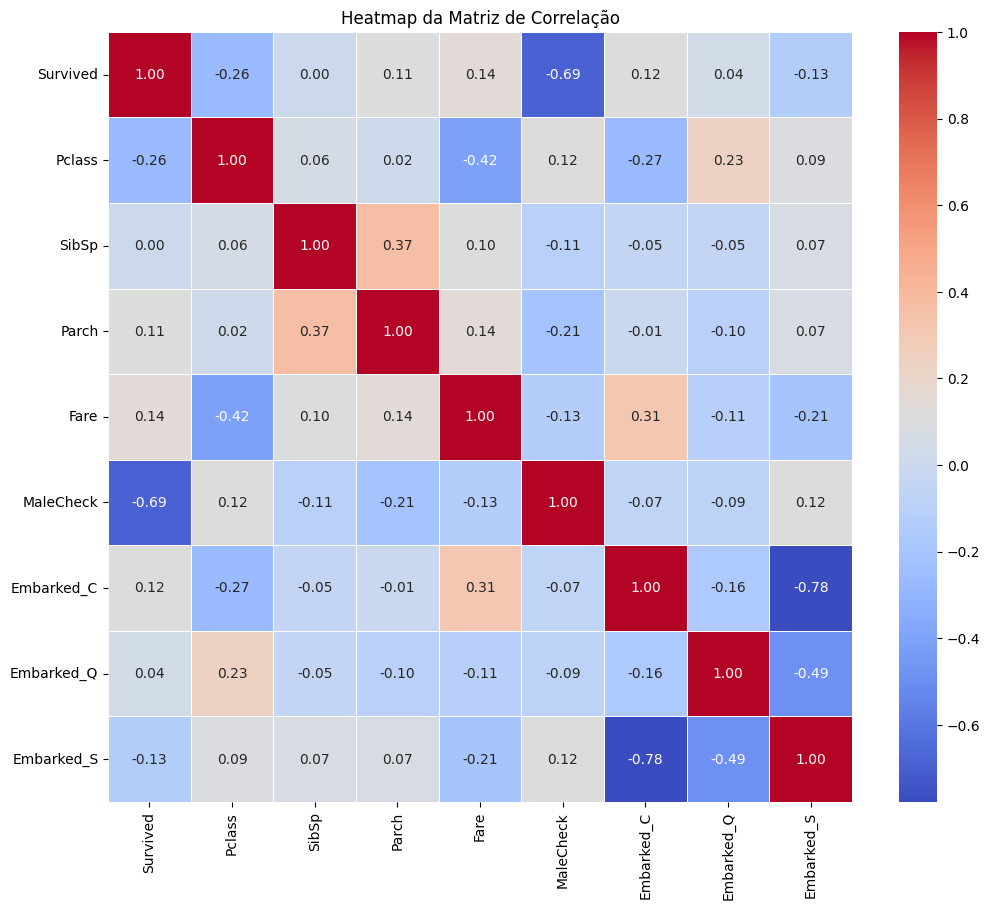

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular a matriz de correlação (apenas atributos numéricos)
correlacao = titanic_df.corr(numeric_only=True)


plt.figure(figsize=(12, 10))

sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Heatmap da Matriz de Correlação')


plt.savefig('heatmap_correlacao.png')

plt.show()

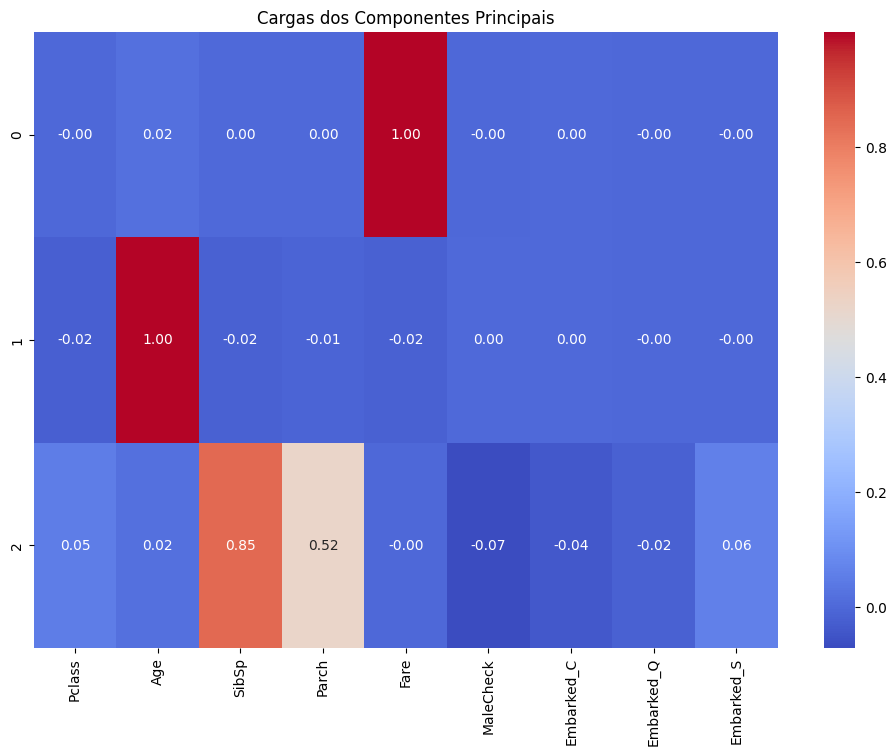

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Separar as features e o target
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

componentes_principais = pca.components_

componentes_principais_df = pd.DataFrame(componentes_principais, columns=X.columns)




plt.figure(figsize=(12, 8))
sns.heatmap(componentes_principais_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cargas dos Componentes Principais')
plt.show()

In [39]:
titanic_df.head(1000)

,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,1,3,16.0,1,1,8.5167,0,1,0,0
996,0,3,28.0,0,0,22.5250,1,0,0,1
997,0,3,21.0,0,0,7.8208,1,0,1,0
998,0,3,29,0,0,7.7500,1,0,1,0


In [40]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from scipy.optimize import differential_evolution as de
import warnings

warnings.filterwarnings("ignore")

def fun_dtc_fs(x, *args):
    X, y, flag, n_splits, random_seed = args
    clf = DecisionTreeClassifier(random_state=random_seed)
    params = {
        'max_depth': int(x[0]),
        'min_samples_split': int(x[1]),
                'min_samples_leaf': int(x[2]),
        'max_features': int(x[3])

    }
    clf.set_params(**params)

    try:
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
        y_pred = cross_val_predict(clf, X, y, cv=cv, n_jobs=-1)
        result = -accuracy_score(y, y_pred)
    except Exception as e:
        y_pred = [None]
        result = 1e12
        print(f"Exception occurred: {e}")

    if flag == 'eval':
        return result
    else:
        return {
            'Y_TRUE': y,
            'Y_PRED': y_pred,
            'BEST_PARAMS': params,
            'PARAMS': x,
            'EST_NAME': 'DT',
            'ESTIMATOR': clf,
            'DATA': X,
            'SEED': random_seed
        }

def run_experiment(X, y, n_splits=10, n_iterations=50, preprocess=True):
    list_results = []

    if preprocess:
        scaler = StandardScaler()

        # Aplicar SMOTE
        sm = SMOTE(random_state=42)
        X, y = sm.fit_resample(X, y)

        # Normalizar os dados
        X = scaler.fit_transform(X)

        # Seleção de características com RFE
        clf = DecisionTreeClassifier(random_state=42)
        selector = RFE(clf, n_features_to_select=5, step=1)
        selector = selector.fit(X, y)
        X = selector.transform(X)

    for run in range(n_iterations):
        random_seed = run * 10 + 100
        args = (X, y, 'eval', n_splits, random_seed)
        print(f"Execução {run + 1}/{n_iterations}")

        bounds = [(2, 10), (2, 20), (1, 20), (1, X.shape[1])]
        res = de(func=fun_dtc_fs, bounds=bounds, args=args, maxiter=100, popsize=50, seed=run, disp=True, polish=False)
        xopt, fopt = res['x'], res['fun']

        sim = fun_dtc_fs(xopt, *(X, y, 'run', n_splits, random_seed))
        sim['RUN'] = run
        sim['ACCURACY'] = accuracy_score(sim['Y_TRUE'], sim['Y_PRED'])
        sim['F1'] = f1_score(sim['Y_TRUE'], sim['Y_PRED'], average='weighted')
        sim['RECALL'] = recall_score(sim['Y_TRUE'], sim['Y_PRED'], average='weighted')

        list_results.append(sim)

    return pd.DataFrame(list_results)


# Dividir X e y
X = titanic_df.drop('Survived', axis=1).values
y = titanic_df['Survived'].values

# Executar experimento com e sem pré-processamento
results_preprocessed = run_experiment(X, y, preprocess=True)
results_original = run_experiment(X, y, preprocess=False)

# Salvar os resultados
results_preprocessed.to_csv("resultados_titanic_preprocessed.csv", index=False)
results_original.to_csv("resultados_titanic_original.csv", index=False)

# Calcular a média e desvio padrão das métricas para ambos os casos
metrics = ['ACCURACY', 'F1', 'RECALL']
summary_preprocessed = {metric: (results_preprocessed[metric].mean(), results_preprocessed[metric].std()) for metric in metrics}
summary_original = {metric: (results_original[metric].mean(), results_original[metric].std()) for metric in metrics}

# Apresentar os resultados
print("\nResultados Médios e Desvios Padrão (Pré-processados):")
for metric, (mean, std) in summary_preprocessed.items():
    print(f"{metric}: Média = {mean:.4f}, Desvio Padrão = {std:.4f}")

print("\nResultados Médios e Desvios Padrão (Originais):")
for metric, (mean, std) in summary_original.items():
    print(f"{metric}: Média = {mean:.4f}, Desvio Padrão = {std:.4f}")

# Melhor modelo para ambos os casos
best_model_preprocessed_idx = results_preprocessed['ACCURACY'].idxmax()
best_model_preprocessed = results_preprocessed.iloc[best_model_preprocessed_idx]

best_model_original_idx = results_original['ACCURACY'].idxmax()
best_model_original = results_original.iloc[best_model_original_idx]

print("\nMelhor Modelo (Pré-processados):")
print(f"Parâmetros: {best_model_preprocessed['BEST_PARAMS']}")
print(f"Acurácia: {best_model_preprocessed['ACCURACY']:.4f}")
print(f"F1 Score: {best_model_preprocessed['F1']:.4f}")
print(f"Recall: {best_model_preprocessed['RECALL']:.4f}")

print("\nMelhor Modelo (Originais):")
print(f"Parâmetros: {best_model_original['BEST_PARAMS']}")
print(f"Acurácia: {best_model_original['ACCURACY']:.4f}")
print(f"F1 Score: {best_model_original['F1']:.4f}")
print(f"Recall: {best_model_original['RECALL']:.4f}")


Execução 1/50
differential_evolution step 1: f(x)= -0.88589
differential_evolution step 2: f(x)= -0.88589
differential_evolution step 3: f(x)= -0.88589
Execução 2/50
differential_evolution step 1: f(x)= -0.884663
differential_evolution step 2: f(x)= -0.884663
Execução 3/50
differential_evolution step 1: f(x)= -0.892638
differential_evolution step 2: f(x)= -0.892638
differential_evolution step 3: f(x)= -0.892638
differential_evolution step 4: f(x)= -0.892638
Execução 4/50
differential_evolution step 1: f(x)= -0.887117
differential_evolution step 2: f(x)= -0.887117
differential_evolution step 3: f(x)= -0.887117
Execução 5/50
differential_evolution step 1: f(x)= -0.889571
differential_evolution step 2: f(x)= -0.892638
differential_evolution step 3: f(x)= -0.892638
differential_evolution step 4: f(x)= -0.892638
Execução 6/50
differential_evolution step 1: f(x)= -0.88773
differential_evolution step 2: f(x)= -0.889571
Execução 7/50
differential_evolution step 1: f(x)= -0.891411
differential_

Class Balance Information (Before SMOTE):
   Class  Count  Percentage
0      0    815   62.261268
1      1    494   37.738732


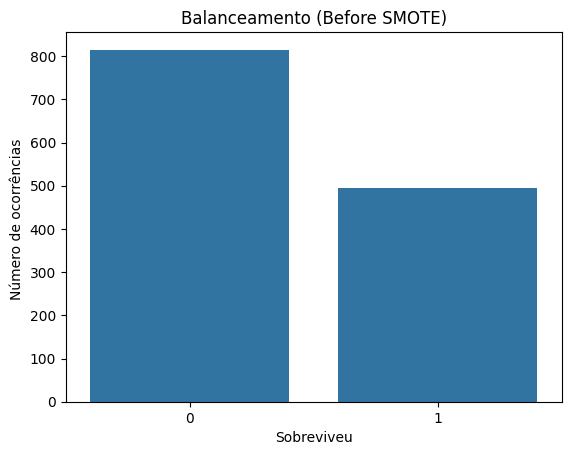

Class Balance Information (Após usar o SMOTE):
   Class  Count  Percentage
0      0    815        50.0
1      1    815        50.0


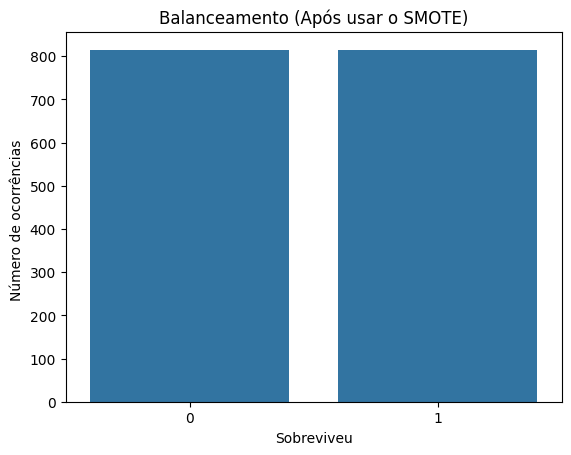

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

def analyze_class_balance(y, title):
    class_counts = np.bincount(y)
    class_labels = np.unique(y)

    balance_info = pd.DataFrame({
        'Class': class_labels,
        'Count': class_counts,
        'Percentage': class_counts / len(y) * 100
    })

    print(f"Class Balance Information ({title}):")
    print(balance_info)

    sns.barplot(x='Class', y='Count', data=balance_info)
    plt.title(f'Balanceamento ({title})')
    plt.xlabel('Sobreviveu')
    plt.ylabel('Número de ocorrências ')
    plt.show()

    return balance_info


X = titanic_df.drop('Survived', axis=1).values
y = titanic_df['Survived'].values

balance_info_before = analyze_class_balance(y, "Before SMOTE")

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

balance_info_after = analyze_class_balance(y_resampled, "Após usar o SMOTE")


In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from pyswarm import pso
import warnings

warnings.filterwarnings("ignore")

# Função para o classificador de árvore de decisão
def fun_dtc_fs(x, *args):
    X, y, flag, n_splits, random_seed = args
    n_samples, n_var = X.shape
    clf = DecisionTreeClassifier(random_state=random_seed)
    p = {
        'max_depth': int(x[0]),
        'min_samples_split': int(x[1]),
        'min_samples_leaf': int(x[2]),
        'max_features': int(x[3])
    }
    clf.set_params(**p)

    try:
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=int(random_seed))
        y_p = cross_val_predict(clf, X, y, cv=cv, n_jobs=-1)
        r = -accuracy_score(y, y_p)
    except:
        y_p = [None]
        r = 1e12

    if flag == 'eval':
        return r
    else:
        return {'Y_TRUE': y, 'Y_PRED': y_p, 'BEST_PARAMS': p, 'PARAMS': x, 'EST_NAME': 'DT',
                'ESTIMATOR': clf, 'DATA': X, 'SEED': random_seed}

# Função para realizar otimização e avaliação
def optimize_and_evaluate(X, y, n_splits=10, random_seed=42, runs=2):
    list_results = []

    lb_dtc = [2, 2, 1, 1]
    ub_dtc = [10, 20, 20, X.shape[1]]

    for run in range(runs):
        random_seed = run * 10 + 100
        args = (X, y, 'eval', n_splits, random_seed)

        le = LabelEncoder()
        le.fit(y)
        y = le.transform(y)

        optimizers = [
            ('DT', lb_dtc, ub_dtc, fun_dtc_fs, args, random_seed),
        ]

        for (clf_name, lb, ub, fun, args, random_seed) in optimizers:
            xopt, fopt = pso(func=fun, lb=lb, ub=ub, args=args, omega=0.6, swarmsize=50, phip=0.5, phig=0.5, maxiter=50, debug=True)
            sim = fun(xopt, *(X, y, 'run', n_splits, random_seed))

            sim['Y_TRUE'] = sim['Y_TRUE']
            sim['Y_PRED'] = sim['Y_PRED']
            sim['RUN'] = run
            sim['ACCURACY'] = accuracy_score(sim['Y_TRUE'], sim['Y_PRED'])
            sim['F1'] = f1_score(sim['Y_TRUE'], sim['Y_PRED'], average='weighted')
            sim['RECALL'] = recall_score(sim['Y_TRUE'], sim['Y_PRED'], average='weighted')

            list_results.append(sim)

    data = pd.DataFrame(list_results)
    return data

# Função para calcular a média e o desvio padrão das métricas
def calculate_metrics(data):
    accuracy_mean = data['ACCURACY'].mean()
    accuracy_std = data['ACCURACY'].std()
    f1_mean = data['F1'].mean()
    f1_std = data['F1'].std()
    recall_mean = data['RECALL'].mean()
    recall_std = data['RECALL'].std()
    return accuracy_mean, accuracy_std, f1_mean, f1_std, recall_mean, recall_std

# Função para encontrar e imprimir os melhores parâmetros
def print_best_params(data, label):
    best_result = data.loc[data['ACCURACY'].idxmax()]
    print(f"\nMelhor Modelo ({label}):")
    print(f"Parâmetros: {best_result['BEST_PARAMS']}")
    print(f"Acurácia: {best_result['ACCURACY']:.4f}")
    print(f"F1 Score: {best_result['F1']:.4f}")
    print(f"Recall: {best_result['RECALL']:.4f}")


X = titanic_df.drop('Survived', axis=1).values
y = titanic_df['Survived'].values


print("Avaliação sem pré-processamento")
data_no_preprocessing = optimize_and_evaluate(X, y)

# Aplicar balanceamento
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Aplicar RFE para seleção de características
clf = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=clf, n_features_to_select=7)
X_selected = rfe.fit_transform(X_balanced, y_balanced)

# Normalização
scaler = MinMaxScaler(feature_range=(0, 1))
X_preprocessed = scaler.fit_transform(X_selected)


print("Avaliação com pré-processamento")
data_with_preprocessing = optimize_and_evaluate(X_preprocessed, y_balanced)

# Salvar resultados em arquivos CSV
data_no_preprocessing.to_csv("resultados_sem_preprocessamento.csv", index=False)
data_with_preprocessing.to_csv("resultados_com_preprocessamento.csv", index=False)

# Calcular a média e o desvio padrão das métricas
acc_mean_no, acc_std_no, f1_mean_no, f1_std_no, recall_mean_no, recall_std_no = calculate_metrics(data_no_preprocessing)
acc_mean_pre, acc_std_pre, f1_mean_pre, f1_std_pre, recall_mean_pre, recall_std_pre = calculate_metrics(data_with_preprocessing)

print(f'Resultados Médios e Desvios Padrão (Originais):')
print(f'ACCURACY: Média = {acc_mean_no:.4f}, Desvio Padrão = {acc_std_no:.4f}')
print(f'F1: Média = {f1_mean_no:.4f}, Desvio Padrão = {f1_std_no:.4f}')
print(f'RECALL: Média = {recall_mean_no:.4f}, Desvio Padrão = {recall_std_no:.4f}')

print(f'\nResultados Médios e Desvios Padrão (Pré-processados):')
print(f'ACCURACY: Média = {acc_mean_pre:.4f}, Desvio Padrão = {acc_std_pre:.4f}')
print(f'F1: Média = {f1_mean_pre:.4f}, Desvio Padrão = {f1_std_pre:.4f}')
print(f'RECALL: Média = {recall_mean_pre:.4f}, Desvio Padrão = {recall_std_pre:.4f}')


print_best_params(data_no_preprocessing, "Originais")
print_best_params(data_with_preprocessing, "Pré-processados")


Avaliação sem pré-processamento
No constraints given.
Best after iteration 1: [ 4.47341174 14.2724912   8.53828935  7.12554201] -0.868601986249045
Best after iteration 2: [ 4.47341174 14.2724912   8.53828935  7.12554201] -0.868601986249045
Best after iteration 3: [ 4.47341174 14.2724912   8.53828935  7.12554201] -0.868601986249045
Best after iteration 4: [ 4.47341174 14.2724912   8.53828935  7.12554201] -0.868601986249045
New best for swarm at iteration 5: [ 4.45687202 16.53176245  7.95282488  7.29147196] -0.8693659281894576
Best after iteration 5: [ 4.45687202 16.53176245  7.95282488  7.29147196] -0.8693659281894576
Best after iteration 6: [ 4.45687202 16.53176245  7.95282488  7.29147196] -0.8693659281894576
Best after iteration 7: [ 4.45687202 16.53176245  7.95282488  7.29147196] -0.8693659281894576
Best after iteration 8: [ 4.45687202 16.53176245  7.95282488  7.29147196] -0.8693659281894576
Best after iteration 9: [ 4.45687202 16.53176245  7.95282488  7.29147196] -0.8693659281894576